# CS/ECE/ISyE 524 - Spr 2018 - HW 4 - Solutions
### Prepared by: Laurent Lessard

## 1. The chess problem

A small joinery makes two different sizes of boxwood chess sets. The small set requires 3 hours of machining on a lathe, and the large set requires 2 hours. There are four lathes with skilled operators who each work a 40 hour week, so we have 160 lathe-hours per week. The small chess set requires 1 kg of boxwood, and the large set requires 4 kg. Unfortunately, boxwood is scarce and only 200 kg per week can be obtained. When sold, each of the large chess sets yields a profit of \$8, and one of the small chess set has a profit of \$5. The problem is to decide how many sets of each kind should be made each week so as to maximize profit.

**a)** Write out the primal LP. Plot the feasible set and solve the LP graphically. Be sure to label the axes and indicate units. Label the optimal point and find the optimal objective.

**b)** Repeat all the same steps as in part a but for the dual LP this time. Verify that the optimal dual objective is the same as the optimal objective of part a.

**Solution for part a:**

For the primal, the variables are $x_1$ (number of small chess sets) and $x_2$ (number of large chess sets). We can write the problem as follows:
\begin{align}
\underset{x_1,x_2}{\text{maximize}} \qquad& 5x_1 + 8x_2 \\
\text{subject to:}\qquad& 3x_1 + 2x_2 \le 160  && \text{(constraint on lathe-hours per week)}\\
& x_1 + 4x_2 \le 200 && \text{(constraint on kg of boxwood per week)}\\
& x_1\ge 0,\,\,x_2\ge 0
\end{align}

In [123]:
using JuMP, Clp
m = Model(solver=ClpSolver())
@variable(m,x[1:2]>=0)
@constraint(m,3x[1]+2x[2]<=160)
@constraint(m,x[1]+4x[2]<=200)
@objective(m,Max,5x[1]+8x[2])
solve(m)
println("optimal x is: ", getvalue(x))

println("optimal objective is: ", getobjectivevalue(m))

optimal x is: [24.0, 44.0]
optimal objective is: 472.0


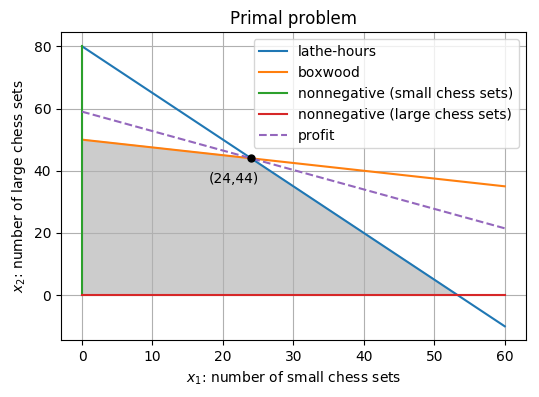

In [124]:
# PLOT THE PRIMAL PROBLEM
using PyPlot

figure(figsize=(6,4))
x1 = linspace(0,60,20)

plot(x1,(160-3x1)/2)
plot(x1,(200-x1)/4)
plot([0,0],[0,80])
plot(x1,0*x1)
plot(x1,(472-5x1)/8,"--")
plot(24, 44,"k.", markersize=10)
text(18,36,"(24,44)")
fill([0,160/3,24,0,0],[0,0,44,50,0],color=(.8,.8,.8))
legend(["lathe-hours","boxwood","nonnegative (small chess sets)","nonnegative (large chess sets)","profit"])
xlabel(L"$x_1$: number of small chess sets")
ylabel(L"$x_2$: number of large chess sets")
title("Primal problem")
grid()

As we can see, the optimal solution is to produce 24 small chess sets and 44 large chess sets

**Solution for part b:**

For the dual, the variables are $y_1$ (price of one lathe-hour in \$) and $y_2$ (price of 1kg of boxwood in \$). We can write the problem as follows:
\begin{align}
\underset{y_1,y_2}{\text{minimize}} \qquad& 160y_1 + 200y_2 \\
\text{subject to:}\qquad& 3y_1 + y_2 \ge 5  && \text{(constraint on price of a small chess set)}\\
& 2y_1 + 4y_2 \ge 8 && \text{(constraint on price of a large chess set)}\\
& y_1\ge 0,\,\,y_2\ge 0
\end{align}

In [125]:
using JuMP, Clp
m = Model(solver=ClpSolver())
@variable(m,y[1:2]>=0)
@constraint(m,3y[1]+y[2]>=5)
@constraint(m,2y[1]+4y[2]>=8)
@objective(m,Min,160y[1]+200y[2])
solve(m)
println("optimal y is: ", getvalue(y))

println("optimal dual objective is: ", getobjectivevalue(m))

optimal y is: [1.2, 1.4]
optimal dual objective is: 471.99999999999994


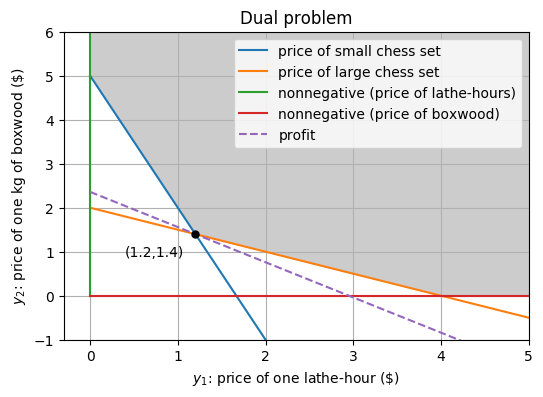

In [143]:
# PLOT THE DUAL PROBLEM
using PyPlot

figure(figsize=(6,4))
y1 = linspace(0,5,20)

plot(y1,5-3y1)
plot(y1,(8-2y1)/4)
plot([0,0],[0,8])
plot(y1,0*y1)
plot(y1,(472-160y1)/200,"--")
plot(1.2, 1.4,"k.", markersize=10)
text(.4,.9,"(1.2,1.4)")
fill([0,1.2,4,8,8,0,0],[5,1.4,0,0,8,8,5],color=(.8,.8,.8))
legend(["price of small chess set","price of large chess set","nonnegative (price of lathe-hours)",
        "nonnegative (price of boxwood)","profit"])
xlabel(L"$y_1$: price of one lathe-hour (\$)")
ylabel(L"$y_2$: price of one kg of boxwood (\$)")
title("Dual problem")
ylim([-1,6])
xlim([-.3,5])
grid()

## 2. Stigler's supplement

Consider Stigler's diet problem from Homework 2. To help further lower the cost of your diet, a friend offers to sell you calcium supplements. Each calcium pill
contains 500 mg of calcium.

**a)** What is the most you would be willing to pay per pill? _Hint:_ use duality!

**b)** Suppose you can buy calcium pills cost \$0.01 each.

**Solution:** Let's start by solving the problem as we did before, then compute the dual variable associated with calcium.

In [26]:
using NamedArrays

# import Stigler's data set
raw = readcsv("stigler.csv");
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)

# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray( raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients") );

In [27]:
# Write as a linear program and solve!

using JuMP,Clp
m = Model(solver=ClpSolver())

@variable(m, x[foods] >= 0)
@constraint(m, y[j in nutrients], sum( data[i,j]*x[i] for i in foods ) >= lower[j] )
@objective(m, Min, sum(x))

solve(m)
println("The optimal (daily) diet is:")
xopt = getvalue(x)
for i in foods
    if xopt[i] > 1e-6
        println(i, ": ", xopt[i])
    end
end
println()
println("The cost per year is: \$", 365*getobjectivevalue(m))

# the price of calcium (the dual variable is in $/g, so divide by 2 to get $/500mg.)
calcium_price = getdual(y["Calcium (g)"]) / 2
println("The price of calcium is \$", calcium_price, " per 500mg pill.")

The optimal (daily) diet is:
Wheat Flour (Enriched): 0.02951906167648827
Liver (Beef): 0.0018925572907052643
Cabbage: 0.011214435246144865
Spinach: 0.005007660466725203
Navy Beans, Dried: 0.061028563526693246

The cost per year is: $39.66173154546625
The price of calcium is $0.015868856722818517 per 500mg pill.


Therefore, a calcium pill is worth about 1.6 cents. It is worth buying them as long as they are cheaper than this. Let's re-solve the problem by adding calcium pills as a food option and seeing what happens.

In [54]:
# add a new food item and its nutrient content
# if one pill (0.5g) costs $0.01, then $1 buys us 50g. 
# calcium is the third nutrient in the list, so we have:
foods2 = [foods; "Calcium supplement"]
raw2 = [raw[n_foods,n_nutrients]; [0 0 50 0 0 0 0 0 0]]

# data[f,i] is the amount of nutrient i contained in food f.
data2 = NamedArray( raw2, (foods2,nutrients), ("foods","nutrients") );


using JuMP,Clp
m = Model(solver=ClpSolver())

@variable(m, x[foods2] >= 0)
@constraint(m, y[j in nutrients], sum( data2[i,j]*x[i] for i in foods2 ) >= lower[j] )
@objective(m, Min, sum(x))

solve(m)
println("The optimal (daily) diet is:")
xopt = getvalue(x)
for i in foods2
    if xopt[i] > 1e-6
        println(i, ": ", xopt[i])
    end
end
println()
println("The cost per year is: \$", 365*getobjectivevalue(m))

The optimal (daily) diet is:
Wheat Flour (Enriched): 0.06598060307911847
Liver (Beef): 0.00784433892120114
Cabbage: 0.011195027632464827
Spinach: 0.003911295356684479
Calcium supplement: 0.012433796310553268

The cost per year is: $36.9982473745081


**Note:** This optimal solution only costs us \$37 per year, which is \$2.66 cheaper than if we didn't access to the calcium supplements. Our optimal solution requires \$0.01243 of calcium supplements per day, which amounts to about 1.24 pills per day.

## 3. Dual interpretation
Suppose $t \in [0,2\pi]$ is a parameter. Consider the following LP:
\begin{align*}
\underset{p,q,r,s}{\text{minimize}}\qquad& p+q+r+s\\
\text{subject to:}\qquad& p-r = \cos(t)\\
& q-s = \sin(t)\\
& p,q,r,s \ge 0
\end{align*}

**a)** Plot the optimal objective of this LP as a function of $t$. Can you explain what you see?
_Hint:_ you can do this by looping over values of $t$, and solving a separate LP for each different value of $t$. To interpret what you're seeing, you may want to separately consider the cases where $\cos(t)$ and $\sin(t)$ are positive or negative (four cases).

**b)** Find the dual LP and interpret it geometrically. Does this agree with the solution of part **a)**?

**Solution to part a:**

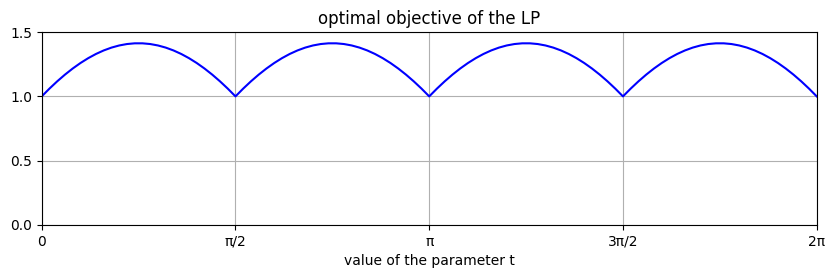

In [64]:
using JuMP, PyPlot, Clp

Npts = 101
tvals = linspace(0,2π,Npts)
optvals = zeros(Npts)

for (i,t) in enumerate(tvals)
    m = Model(solver=ClpSolver())
    @variable(m, p >= 0)
    @variable(m, q >= 0)
    @variable(m, r >= 0)
    @variable(m, s >= 0)
    @constraint(m, p - r == cos(t))
    @constraint(m, q - s == sin(t))
    @objective(m, Min, p + q + r + s)
    solve(m)
    optvals[i] = getobjectivevalue(m)
end

figure(figsize=(10,2.5))
plot( tvals, optvals, "b-" )
xticks(0:π/2:2π)
yticks(0:0.5:1.5)
ylim([0,1.5])
xlim([0,2π])
grid()
g = gca()
g[:set_xticklabels](["0","π/2","π","3π/2","2π"])
xlabel("value of the parameter t")
title("optimal objective of the LP")
;

**Explanation:** If we consider the case where $0 \le t \le \pi/2$, then both $\cos(t)$ and $\sin(t)$ are nonnegative. If we substitute $p=\cos(t)+r$ and $q=\sin(t)+s$ (which is an admissible thing to do since $p,q > 0$ for all $t$ in the interval), the optimization problem becomes:
\begin{align*}
\underset{r,s}{\text{minimize}}\qquad& \cos(t)+\sin(t)+2r+2s\\
\text{subject to:}\qquad& r,s \ge 0
\end{align*}
Since $t$ is a constant, the solution is clearly to set $r=s=0$, whereby the optimal value is $\cos(t)+\sin(t)$. If we consider the case $\pi/2 \le t \le \pi$, then $\cos(t)\le 0$ and $\sin(t)\ge 0$. In this case, substitute $r = p-\cos(t)$ and $q=\sin(t)+s$. Slightly different from the previous case because $\cos(t)\le 0$ so we want to ensure $r\ge 0$ for all $t$. This leads to:
\begin{align*}
\underset{p,s}{\text{minimize}}\qquad& -\cos(t)+\sin(t)+2p+2s\\
\text{subject to:}\qquad& p,s \ge 0
\end{align*}
Again, the solution is to set $p=r=0$, whereby the optimal value is $-\cos(t)+\sin(t)$. We can continue in this manner and we find that the four intervals correspond to the four combinations of signs. Here is a plot showing each of them (observe: the optimal value of the LP is the max of these functions!)

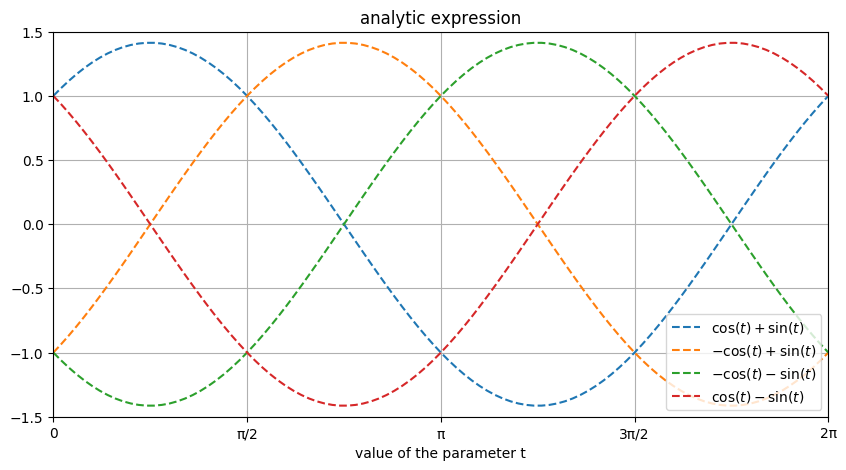

In [66]:
figure(figsize=(10,5))
t = tvals
plot(t, cos.(t)+sin.(t),"--")
plot(t,-cos.(t)+sin.(t),"--")
plot(t,-cos.(t)-sin.(t),"--")
plot(t, cos.(t)-sin.(t),"--")
legend([L"\cos(t)+\sin(t)",L"-\cos(t)+\sin(t)",L"-\cos(t)-\sin(t)",L"\cos(t)-\sin(t)"],loc="lower right")
xticks(0:π/2:2π)
ylim([-1.5,1.5])
xlim([0,2π])
grid()
g = gca()
g[:set_xticklabels](["0","π/2","π","3π/2","2π"])
xlabel("value of the parameter t")
title("analytic expression")
;

**Solution to part b:** For the dual, we'll use variables $x,y$ which will correspond to the $\cos$ and $\sin$ constraints respectively. Here is the dual of the original LP: 
\begin{align*}
\underset{x,y}{\text{maximize}}\qquad& x \cos(t) + y \sin(t) \\
\text{subject to:}\qquad& -1 \le x \le 1 \\
& -1 \le y \le 1
\end{align*}
The feasible set is a square centered at the origin. The objective function is linear and its normal vector is in the direction $(\cos(t),\sin(t))$, which is a vector pointed at an angle $t$ (measured from the $x$-axis). Therefore it's clear that when $0\le t \le \pi/2$, the solution is at $x=1,y=1$. When $\pi/2\le t\le \pi$, the solution is at $x=-1,y=1$, and so on. This yields the same optimal objective values as those found in the previous part!